## Prediction Model for Long Term Investment on the Stock Market





In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-eu.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
!tar xf spark-3.2.1-bin-hadoop2.7.tgz

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

# Importing Libraries

In [3]:
!pip install -q findspark
!pip install pyspark
!pip install yfinance
!pip install yahoofinancials

     |████████████████████████████████| 281.4 MB 37 kB/s 
     |████████████████████████████████| 198 kB 37.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=b39b0e32c1386052b43e3bf5c70a7dd9efab251aba9a4c6598eda5b20780af77
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark
     |████████████████████████████████| 6.4 MB 10.3 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency confl

In [ ]:
# Mounting Google Drive
''' 
from google.colab import drive
drive.mount('/content/gdrive')
'''

" \nfrom google.colab import drive\ndrive.mount('/content/gdrive')\n"

In [4]:
from pyspark.sql import SparkSession, functions as F
from pyspark.sql.functions import desc, avg
from pyspark.sql.window import Window
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date

In [5]:
APP_NAME = "Final Project"

In [6]:
spark = SparkSession.builder.appName(APP_NAME).getOrCreate()

In [7]:
spark

# Data

In [16]:
# Using data from Apple's stock.

today = date.today()
#print("Today's date:", today)

aapl_ticker = yf.Ticker("aapl")
aapl_hist = aapl_ticker.history(start = "2000-01-01", end = today, interval="1d")
aapl = aapl_hist.drop(['High', 'Low', 'Dividends', 'Stock Splits'], axis = 1)
aapl = aapl.reset_index()

In [ ]:
df = spark.createDataFrame(aapl)
df.show()
df.count()

+-------------------+------------------+------------------+----------+
|               Date|              Open|             Close|    Volume|
+-------------------+------------------+------------------+----------+
|2000-01-03 00:00:00|0.8018014924011134|0.8557963967323303| 535796800|
|2000-01-04 00:00:00|0.8276041847949313|0.7836439609527588| 512377600|
|2000-01-05 00:00:00|0.7932002601638561|0.7951114773750305| 778321600|
|2000-01-06 00:00:00|0.8113583490436997|  0.72630375623703| 767972800|
|2000-01-07 00:00:00|0.7377717823628042|0.7607079148292542| 460734400|
|2000-01-10 00:00:00|0.7798209290518798|0.7473287582397461| 505064000|
|2000-01-11 00:00:00|0.7334716807528032|0.7091020941734314| 441548800|
|2000-01-12 00:00:00|0.7263036280033341|0.6665751338005066| 976068800|
|2000-01-13 00:00:00|0.7223614182731647|0.7396829724311829|1032684800|
|2000-01-14 00:00:00| 0.764530636293674|0.7678752541542053| 390376000|
|2000-01-18 00:00:00|0.7721760674005844|0.7946335673332214| 459177600|
|2000-

5579

# Exploratory Data Analysis

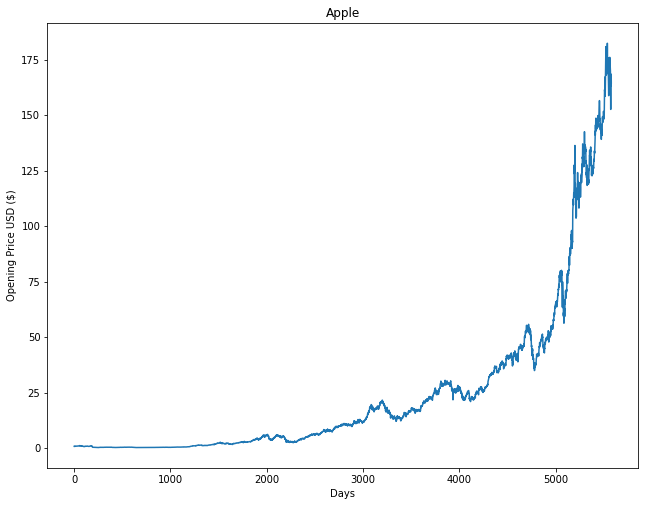

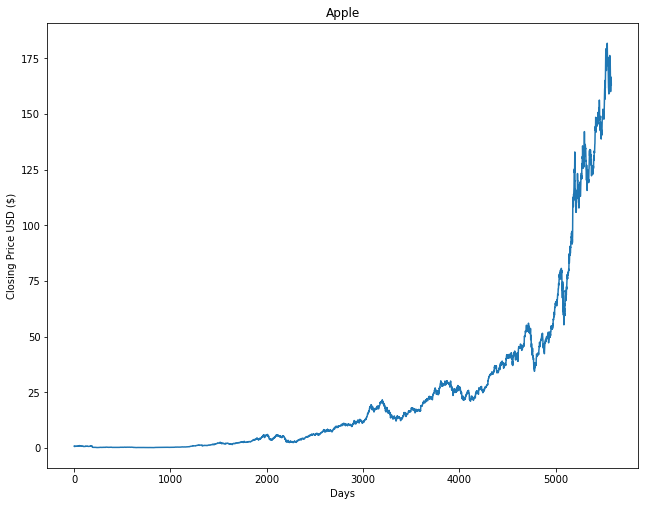

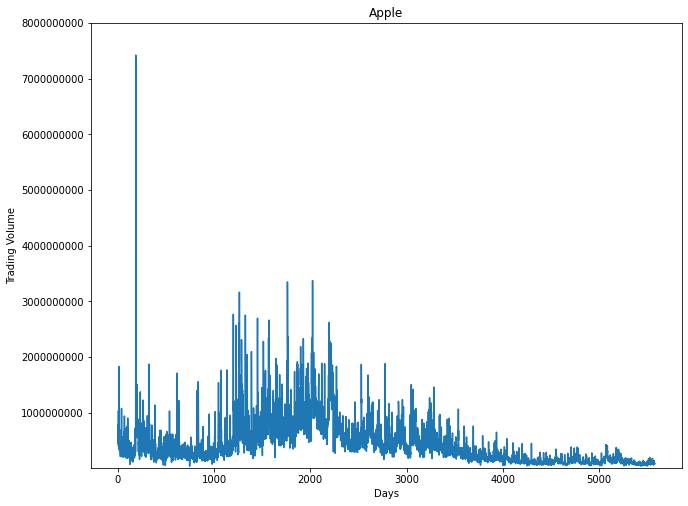

In [ ]:
# Convert dataframe to Pandas
pdf = df.toPandas()

# Visualizing the opening prices of the data.
plt.figure(figsize=(36,18))
#plt.figure(figsize=(16,8))   # Inital size
plt.subplot(2, 3, 1)
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(pdf['Open'])

# Visualizing the closing prices of the data.
plt.figure(figsize=(36,18))
plt.subplot(2, 3, 2)
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(pdf['Close'])

# Visualizing the trading volume of the data.
plt.figure(figsize=(36,18))
plt.subplot(2, 3, 3)
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Trading Volume')
plt.ylim((10000000,8000000000))
plt.ticklabel_format(style='plain')    # to prevent scientific notation
plt.plot(pdf['Volume'])

plt.show()

+-------------------+------------------+------------------+----------+-------------------+
|               Date|              Open|             Close|    Volume|     Daily Return %|
+-------------------+------------------+------------------+----------+-------------------+
|2000-01-03 00:00:00|0.8018014924011134|0.8557963967323303| 535796800|  6.309316624536458|
|2000-01-04 00:00:00|0.8276041847949313|0.7836439609527588| 512377600| -5.609718958176539|
|2000-01-05 00:00:00|0.7932002601638561|0.7951114773750305| 778321600|0.24037097508440466|
|2000-01-06 00:00:00|0.8113583490436997|  0.72630375623703| 767972800|-11.710608967153965|
|2000-01-07 00:00:00|0.7377717823628042|0.7607079148292542| 460734400| 3.0151036974024588|
|2000-01-10 00:00:00|0.7798209290518798|0.7473287582397461| 505064000| -4.347774718139526|
|2000-01-11 00:00:00|0.7334716807528032|0.7091020941734314| 441548800| -3.436682359227604|
|2000-01-12 00:00:00|0.7263036280033341|0.6665751338005066| 976068800| -8.960504401399284|

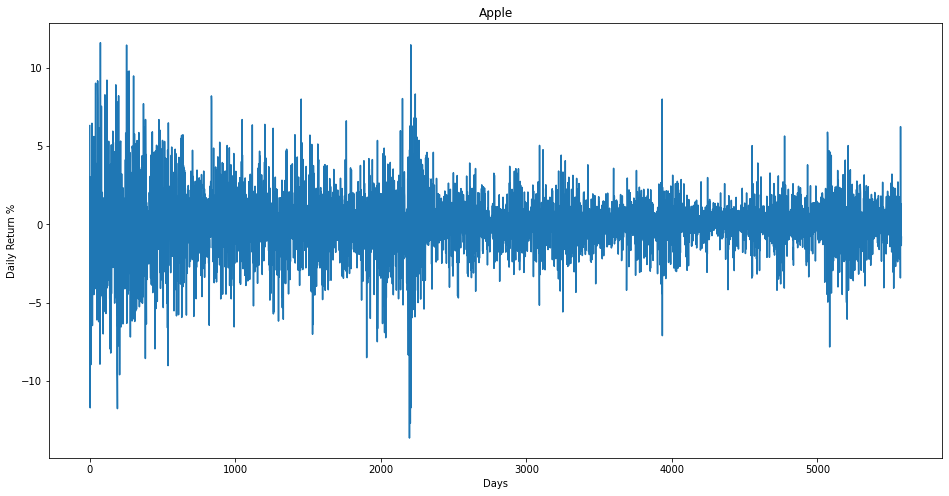

In [ ]:
# Visualizing the Daily Return % of the data.
daily_return = df.withColumn("Daily Return %", ((df["Close"]-df["Open"])/df["Close"])*100)
daily_return.show()

daily_return.select('Daily Return %').describe().show()

pdr = daily_return.toPandas() # Convert dataframe to Pandas

plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Daily Return %')
plt.plot(pdr['Daily Return %'])
plt.show()

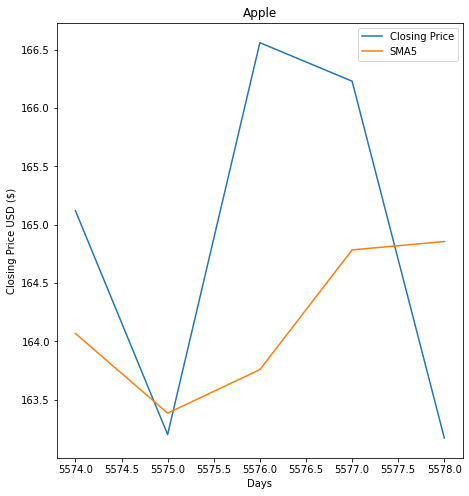

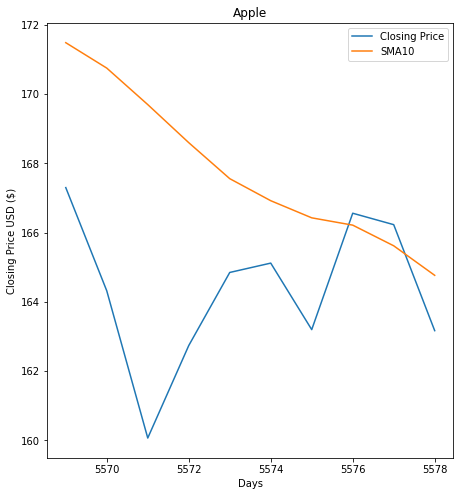

In [ ]:
# Short Term 1W - 2W
# Visualizing the 5 Day Simple Moving Average (SMA5) of the data.
w = Window.orderBy('Date').rowsBetween(-5, 0)
SMA5 = df.withColumn('SMA5', F.avg('Close').over(w))

psma5 = SMA5.toPandas() # Convert dataframe to Pandas

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(psma5['Close'].iloc[-5:], label = 'Closing Price')
plt.plot(psma5['SMA5'].iloc[-5:], label = 'SMA5')
plt.legend(loc = 'upper right')

# Visualizing the 10 Day Simple Moving Average (SMA10) of the data.
w = Window.orderBy('Date').rowsBetween(-10, 0)
SMA10 = df.withColumn('SMA10', F.avg('Close').over(w))

psma10 = SMA10.toPandas() # Convert dataframe to Pandas

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 2)
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(psma10['Close'].iloc[-10:], label = 'Closing Price')
plt.plot(psma10['SMA10'].iloc[-10:], label = 'SMA10')
plt.legend(loc = 'upper right')

plt.show()

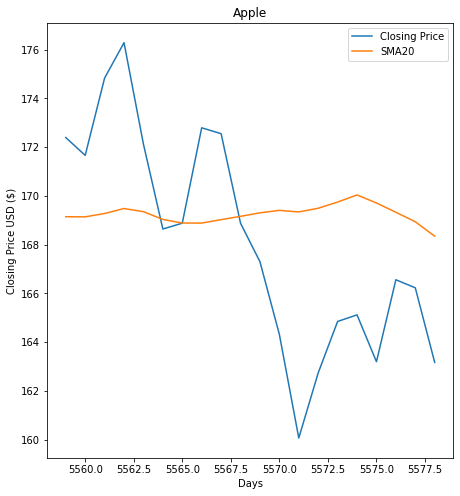

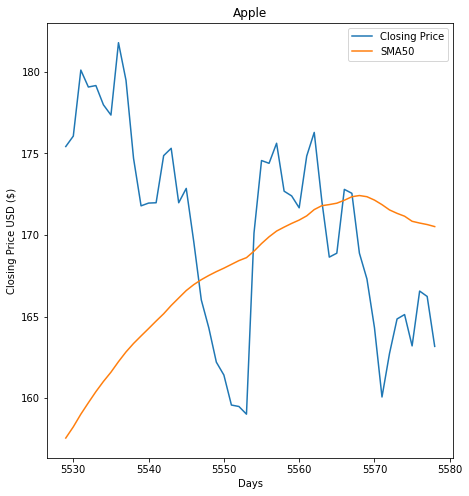

In [ ]:
# Mid Term 1M - 3M
# Visualizing the 20 Day Simple Moving Average (SMA20) of the data.
w = Window.orderBy('Date').rowsBetween(-20, 0)
SMA20 = df.withColumn('SMA20', F.avg('Close').over(w))

psma20 = SMA20.toPandas() # Convert dataframe to Pandas

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 2)
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(psma20['Close'].iloc[-20:], label = 'Closing Price')
plt.plot(psma20['SMA20'].iloc[-20:], label = 'SMA20')
plt.legend(loc = 'upper right')

# Visualizing the 50 Day Simple Moving Average (SMA50) of the data.
w = Window.orderBy('Date').rowsBetween(-50, 0)
SMA50 = df.withColumn('SMA50', F.avg('Close').over(w))

psma50 = SMA50.toPandas() # Convert dataframe to Pandas

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 2)
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(psma50['Close'].iloc[-50:], label = 'Closing Price')
plt.plot(psma50['SMA50'].iloc[-50:], label = 'SMA50')
plt.legend(loc = 'upper right')

plt.show()

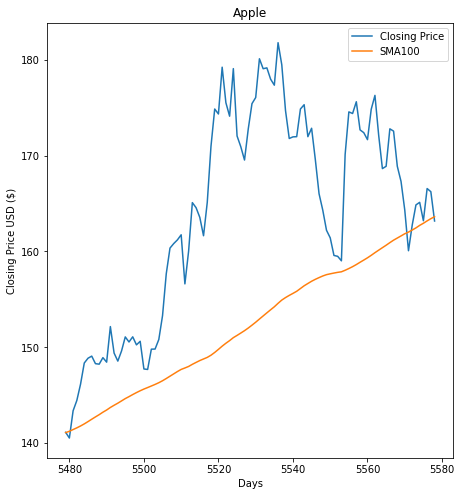

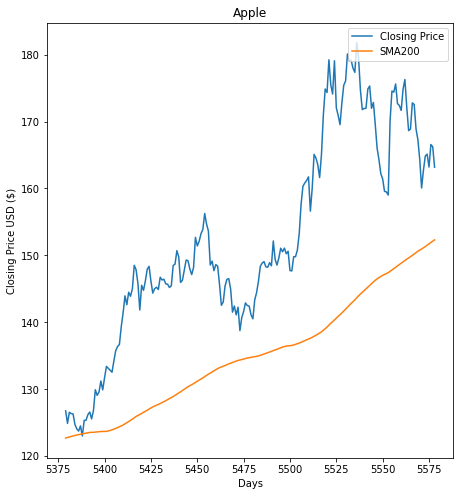

In [ ]:
# Long Term 5M - 10M
# Visualizing the 100 Day Simple Moving Average (SMA50) of the data.
w = Window.orderBy('Date').rowsBetween(-100, 0)
SMA100 = df.withColumn('SMA100', F.avg('Close').over(w))

psma100 = SMA100.toPandas() # Convert dataframe to Pandas

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 2)
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(psma100['Close'].iloc[-100:], label = 'Closing Price')
plt.plot(psma100['SMA100'].iloc[-100:], label = 'SMA100')
plt.legend(loc = 'upper right')


# Visualizing the 200 Day Simple Moving Average (SMA50) of the data.
w = Window.orderBy('Date').rowsBetween(-200, 0)
SMA200 = df.withColumn('SMA200', F.avg('Close').over(w))

psma200 = SMA200.toPandas() # Convert dataframe to Pandas

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 2)
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(psma200['Close'].iloc[-200:], label = 'Closing Price')
plt.plot(psma200['SMA200'].iloc[-200:], label = 'SMA200')
plt.legend(loc = 'upper right')

plt.show()

# Linear Regression and Machine Learning (Gradient Boosting)


In [ ]:
from pyspark.ml.feature import VectorAssembler, VectorIndexer
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline

In [ ]:
df.columns

['Date', 'Open', 'Close', 'Volume']

In [ ]:
# Split the dataset randomly into 80% for training and 20% for testing. Passing a seed for deterministic behavior
train, test = df.randomSplit([0.8, 0.2], seed = 0)
 
# Remove the target column from the input feature set and clean dataset. 
# Choose columns to choose in your prediction
df1 = df.drop('Date')
featuresCols = df1.columns
featuresCols.remove('Close')
 
# Change to a vector
vectorAssembler = VectorAssembler(inputCols=featuresCols, outputCol="rawFeatures")
 
# vectorIndexer identifies categorical features and indexes them, and creates a new column "features". 
vectorIndexer = VectorIndexer(inputCol="rawFeatures", outputCol="features", maxCategories=4)

# Gradient regresson. We will choose this for prediction
gbt = GBTRegressor(labelCol="Close")

# Creation of the Parameter Grid, Evaluator, and Cross Validator
paramGrid = ParamGridBuilder().addGrid(gbt.maxDepth, [2, 5]).addGrid(gbt.maxIter, [10, 100]).build()
evaluator = RegressionEvaluator(metricName="rmse", labelCol=gbt.getLabelCol(), predictionCol=gbt.getPredictionCol())
cv = CrossValidator(estimator=gbt, evaluator=evaluator, estimatorParamMaps=paramGrid)

In [ ]:
# Pipeline
pipeline = Pipeline(stages=[vectorAssembler, vectorIndexer, cv])

In [ ]:
# Pipeline Test Dataset
pipeline_model = pipeline.fit(train)
predictions1 = pipeline_model.transform(test)
rmse = evaluator.evaluate(predictions1)
print(rmse)

4.085066659756554


In [ ]:
# Pipeline Train Dataset
pipeline_model = pipeline.fit(test)
predictions2 = pipeline_model.transform(train)
rmse = evaluator.evaluate(predictions2)
print(rmse)

3.5996544460802746


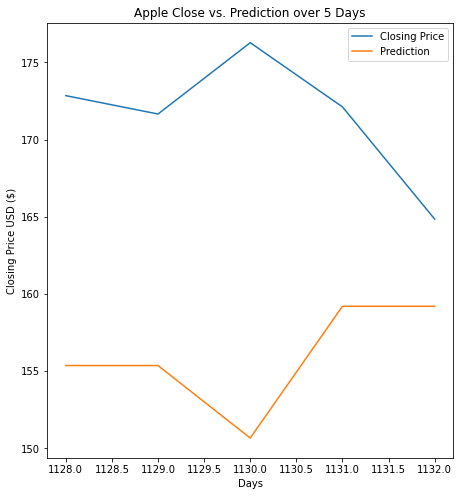

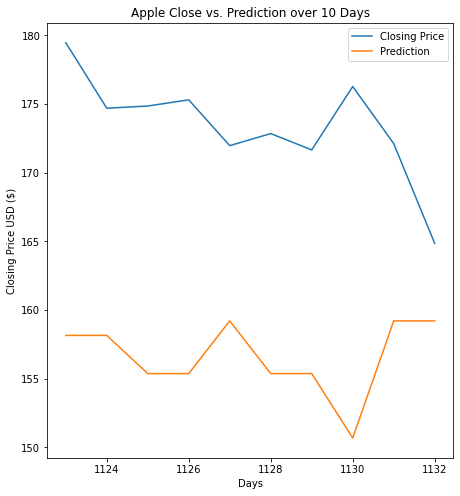

In [ ]:
p = predictions1.toPandas() # Convert dataframe to Pandas

# Visualizing the 5 Day Prediction of the data.
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.title('Apple Close vs. Prediction over 5 Days')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(p['Close'].iloc[-5:], label = 'Closing Price')
plt.plot(p['prediction'].iloc[-5:], label = 'Prediction')
plt.legend(loc = 'upper right')

# Visualizing the 10 Day Prediction of the data.
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 2)
plt.title('Apple Close vs. Prediction over 10 Days')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(p['Close'].iloc[-10:], label = 'Closing Price')
plt.plot(p['prediction'].iloc[-10:], label = 'Prediction')
plt.legend(loc = 'upper right')

plt.show()

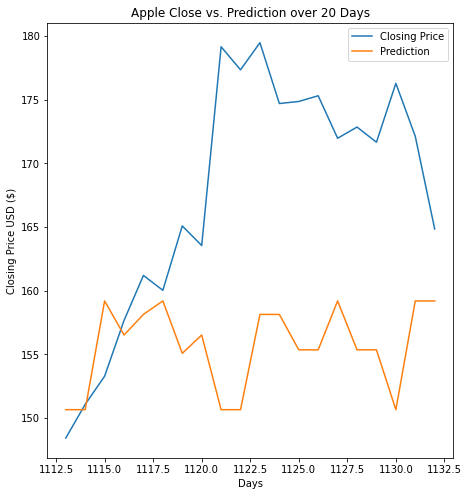

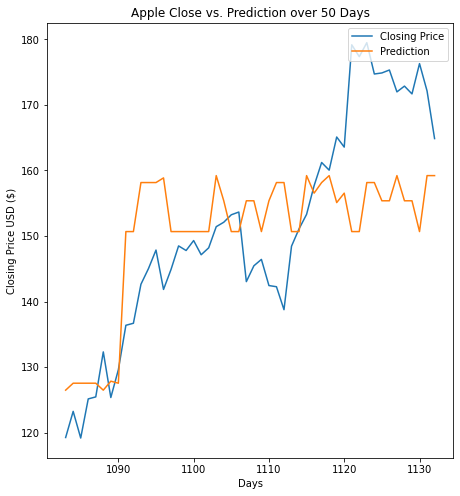

In [ ]:
# Visualizing the 20 Day Prediction of the data.
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.title('Apple Close vs. Prediction over 20 Days')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(p['Close'].iloc[-20:], label = 'Closing Price')
plt.plot(p['prediction'].iloc[-20:], label = 'Prediction')
plt.legend(loc = 'upper right')

# Visualizing the 50 Day Prediction of the data.
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 2)
plt.title('Apple Close vs. Prediction over 50 Days')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(p['Close'].iloc[-50:], label = 'Closing Price')
plt.plot(p['prediction'].iloc[-50:], label = 'Prediction')
plt.legend(loc = 'upper right')

plt.show()

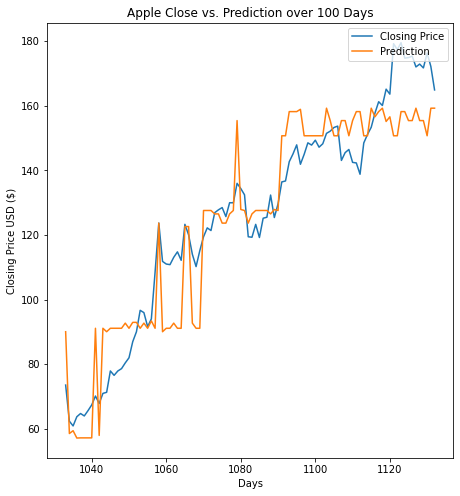

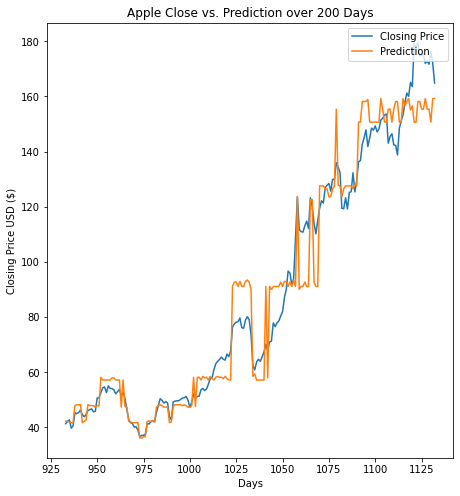

In [ ]:
# Visualizing the 100 Day Prediction of the data.
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.title('Apple Close vs. Prediction over 100 Days')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(p['Close'].iloc[-100:], label = 'Closing Price')
plt.plot(p['prediction'].iloc[-100:], label = 'Prediction')
plt.legend(loc = 'upper right')

# Visualizing the 200 Day Prediction of the data.
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 2)
plt.title('Apple Close vs. Prediction over 200 Days')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(p['Close'].iloc[-200:], label = 'Closing Price')
plt.plot(p['prediction'].iloc[-200:], label = 'Prediction')
plt.legend(loc = 'upper right')

plt.show()